<a href="https://colab.research.google.com/github/Victoriambaka/IP-WEEK-3/blob/main/GroupVII_PROJECT_WEEK_5_2022_FEBRUARY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROFILING CARBON DIOXIDE EMISSIONS IN RELATION TO POLLUTION LEVELS IN EUROPEAN COUNTRIES

## This project seeks to find out the relationship between the rates of pollution and carbon emission levels in Europe.

## It is worked out under the following objectives.
Business objectives

* To assess which European countries have high carbon emissions.
* To investigate which year had the most carbon emissions.
* To find which sub sectors had the most carbon emissions.
* To find which European countries have embraced nuclear power as an alternative source of energy.
* To compare pollution levels of European countries that have embraced nuclear energy and those that have not.


# Importing libraries

In [ ]:
# First we import the python software libraries that we will use here
# Import Pandas library
import pandas as pd

# Import numpy library
import numpy as np

# Loading datasets and Data Preparation

# Dataset 1: Historical emissions(CO2)

In [ ]:
# We have three datasets to load
#     Historical emissions.csv
#     nuclear energy.csv
#     death rates from air pollution
# To load the first dataset and preview them from the given links
# You can either download file in link or use the url to access the file
# We downloaded ours.

# We convert it to a dataframe historical emissions
historical_emissions = pd.read_csv('historical_emissions.csv')
historical_emissions.head()

,Country,Data source,Sector,Gas,Unit,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,European Union (27),CAIT,Total excluding LUCF,CO2,MtCO₂e,2870.98,2926.58,2904.08,2896.83,2839.00,2983.55,3057.61,3117.13,3215.04,3129.33,3379.19,3456.79,3497.03,3489.27,3508.97,3503.77,3411.23,3418.15,3362.28,3355.38,3410.35,3418.58,3487.25,3389.86,3336.37,3348.65,3409.31,3523.68,3562.65
1,European Union (27),CAIT,Energy,CO2,MtCO₂e,2798.69,2854.29,2833.91,2826.65,2768.20,2915.95,2986.29,3041.42,3138.06,3050.77,3283.13,3353.71,3398.38,3393.22,3413.41,3412.40,3321.10,3327.13,3268.98,3263.34,3319.71,3329.79,3400.48,3300.00,3249.86,3267.38,3322.69,3442.09,3475.32
2,European Union (27),CAIT,Total including LUCF,CO2,MtCO₂e,2636.99,2692.12,2669.54,2321.61,2263.78,2408.39,2482.45,2541.91,2900.69,2814.76,3064.51,3142.06,3182.24,3174.41,3193.98,3188.85,3096.47,3103.48,3086.68,3079.46,3134.03,3142.23,3210.93,3113.68,3060.09,3072.40,3133.06,3247.48,3286.44
3,European Union (27),CAIT,Electricity/Heat,CO2,MtCO₂e,1108.45,1161.54,1158.37,1181.42,1158.16,1226.90,1294.02,1314.33,1330.92,1292.70,1405.84,1481.34,1455.83,1442.58,1449.35,1450.35,1405.60,1381.64,1364.21,1345.76,1381.99,1380.96,1420.27,1392.40,1377.23,1376.32,1425.76,1456.81,1465.11
4,European Union (27),CAIT,Transportation,CO2,MtCO₂e,807.16,806.76,792.25,773.05,758.68,751.42,757.98,788.52,794.13,800.13,826.78,843.56,834.69,822.93,824.51,805.01,790.84,782.75,768.34,768.71,750.78,721.41,709.99,687.32,678.76,674.19,669.05,651.17,642.96


In [ ]:
# Getting to know more about the dataset by accessing its information
#
historical_emissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      336 non-null    object 
 1   Data source  336 non-null    object 
 2   Sector       336 non-null    object 
 3   Gas          336 non-null    object 
 4   Unit         336 non-null    object 
 5   2018         310 non-null    float64
 6   2017         310 non-null    float64
 7   2016         310 non-null    float64
 8   2015         310 non-null    float64
 9   2014         336 non-null    float64
 10  2013         336 non-null    float64
 11  2012         336 non-null    float64
 12  2011         336 non-null    float64
 13  2010         336 non-null    float64
 14  2009         336 non-null    float64
 15  2008         336 non-null    float64
 16  2007         336 non-null    float64
 17  2006         336 non-null    float64
 18  2005         336 non-null    float64
 19  2004    

## Validity

In [ ]:
# Checking for missing values in the dataset historical emissions.

# Creating a function to check
def missing_values(data):

  # identifying the missing values from the historical emmisions dataset
  #
  miss = data.isnull().sum().sort_values(ascending = False)
  # finding the percentage of missing values
  percentage = (data.isnull().sum() / len(data)).sort_values(ascending = False)
  # storing  total missing values in percentage in dataframe
  #
  missing_data = pd.DataFrame({'Total' : miss, 'Percentage' : percentage})
  #if the percentage is 0, indicates no missing values hence removed
  #
  missing_data.drop(missing_data[missing_data['Percentage'] == 0].index, inplace = True)

  return missing_data

missing_values(historical_emissions)

,Total,Percentage
2018,26,0.077381
2017,26,0.077381
2016,26,0.077381
2015,26,0.077381
1990,8,0.023810
1991,7,0.020833
1992,2,0.005952


In [ ]:
# Removal of irrelevant data

# Creating a function to drop unnecessary columns
# The dataframe was named historical_df
def drop_columns(data, cols):
  #drop columns not required
  data.drop(cols, axis = 1, inplace = True)

  return data

#columns to be dropped
columns = ['Gas', 'Data source',  '1990', '1991','1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2015','2016', '2017', '2018']
historical_df = drop_columns(historical_emissions, columns)

Conclusion

We dropped the gas column as it indicates the type of gas which was 
already defined earlier

We dropped the column data source as it will not be used for analysis
We dropped the years columns from 1990-2003 because we are only analysing data from 2004-2014

We dropped years 2015-2018 as they had many missing values

In [ ]:
# previewing the altered table contents

historical_df.head()

,Country,Sector,Unit,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004
0,European Union (27),Total excluding LUCF,MtCO₂e,2839.00,2983.55,3057.61,3117.13,3215.04,3129.33,3379.19,3456.79,3497.03,3489.27,3508.97
1,European Union (27),Energy,MtCO₂e,2768.20,2915.95,2986.29,3041.42,3138.06,3050.77,3283.13,3353.71,3398.38,3393.22,3413.41
2,European Union (27),Total including LUCF,MtCO₂e,2263.78,2408.39,2482.45,2541.91,2900.69,2814.76,3064.51,3142.06,3182.24,3174.41,3193.98
3,European Union (27),Electricity/Heat,MtCO₂e,1158.16,1226.90,1294.02,1314.33,1330.92,1292.70,1405.84,1481.34,1455.83,1442.58,1449.35
4,European Union (27),Transportation,MtCO₂e,758.68,751.42,757.98,788.52,794.13,800.13,826.78,843.56,834.69,822.93,824.51


In [ ]:
# Checking for outliers
# checking to see if any values appear True if so they are outliers
#
Q1 = historical_df.quantile(0.25)
Q3 = historical_df.quantile(0.75)

IQR = Q3 - Q1


(historical_df < (Q1 - 1.5 * IQR)) |(historical_df > (Q3 + 1.5 * IQR))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  # Remove the CWD from sys.path while we load stuff.


,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,Country,Sector,Unit
0,True,True,True,True,True,True,True,True,True,True,True,False,False,False
1,True,True,True,True,True,True,True,True,True,True,True,False,False,False
2,True,True,True,True,True,True,True,True,True,True,True,False,False,False
3,True,True,True,True,True,True,True,True,True,True,True,False,False,False
4,True,True,True,True,True,True,True,True,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,False,False,False,False,False,False,False,False,False,False,False,False,False,False
332,False,False,False,False,False,False,False,False,False,False,False,False,False,False
333,False,False,False,False,False,False,False,False,False,False,False,False,False,False
334,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# If we were to keep our complete rows; meaning we drop any record with a missing value, then
#
historical_df = historical_df.dropna()

historical_df.shape

(336, 14)

We did not drop any rows since we had no missing values

## Completeness

In [ ]:
# Checking for completeness of data
# Explanation: checking if any columns have missing values
#
historical_df.isnull().any()

Country    False
Sector     False
Unit       False
2014       False
2013       False
2012       False
2011       False
2010       False
2009       False
2008       False
2007       False
2006       False
2005       False
2004       False
dtype: bool

## Consistency

In [ ]:
# Checking for Duplicates
#  There are no dulicates.                
#
historical_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
331    False
332    False
333    False
334    False
335    False
Length: 336, dtype: bool

In [ ]:
# In country column, drop European union 27 as it is an average of all european countries

historical_df = historical_df[historical_df.Country != "European Union (27)"]
historical_df.head()

,Country,Sector,Unit,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004
5,Germany,Total excluding LUCF,MtCO₂e,737.49,777.63,760.02,746.38,772.92,734.66,789.55,783.60,814.16,802.17,820.83
6,Germany,Energy,MtCO₂e,724.59,765.13,746.73,732.99,760.49,722.10,775.97,769.15,800.82,789.12,806.76
7,Germany,Total including LUCF,MtCO₂e,708.25,748.42,730.81,717.17,754.58,716.32,771.22,765.28,795.83,783.85,802.50
10,Italy,Total excluding LUCF,MtCO₂e,327.49,346.45,376.75,396.69,405.27,397.06,444.98,459.37,466.65,473.83,472.41
11,Italy,Energy,MtCO₂e,319.16,337.58,366.68,384.11,391.99,383.72,428.86,441.46,449.18,456.43,454.99


In [ ]:
# Confirming the number of row and columns in the dataset
historical_df.shape

(324, 14)

In [ ]:
# Sorting the data so that we have them in alphabetical order

historical_df = historical_df.sort_values(
     by="Country",
     ascending=True
 )

historical_df

,Country,Sector,Unit,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004
110,Austria,Electricity/Heat,MtCO₂e,19.38,21.20,21.87,24.38,24.14,19.91,23.59,23.67,24.64,25.65,24.82
96,Austria,Transportation,MtCO₂e,22.65,23.11,21.65,21.72,22.52,21.72,22.55,23.58,23.39,24.54,23.84
57,Austria,Total including LUCF,MtCO₂e,54.92,58.68,58.04,61.20,63.79,58.26,64.56,65.08,67.93,70.07,69.63
55,Austria,Energy,MtCO₂e,60.35,64.10,63.44,66.61,68.34,62.62,68.60,69.11,72.14,74.44,74.01
310,Austria,Fugitive Emissions,MtCO₂e,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,Sweden,Manufacturing/Construction,MtCO₂e,6.97,7.42,7.90,8.61,8.94,6.89,9.37,9.85,9.82,10.77,12.28
79,Sweden,Energy,MtCO₂e,37.70,39.15,40.67,43.23,46.81,41.62,44.75,45.80,47.46,48.89,52.31
75,Sweden,Total excluding LUCF,MtCO₂e,39.10,40.55,42.15,44.59,48.13,42.88,46.15,47.14,48.90,50.21,53.59
303,Sweden,Land-Use Change and Forestry,MtCO₂e,-22.20,-22.24,-22.25,-22.28,-10.98,-11.12,-11.21,-11.26,-11.29,-11.32,-11.42


In [ ]:
# Resetting the indices
historical_df.reset_index(drop=True, inplace=True)
historical_df.head()

,Country,Sector,Unit,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004
0,Austria,Electricity/Heat,MtCO₂e,19.38,21.20,21.87,24.38,24.14,19.91,23.59,23.67,24.64,25.65,24.82
1,Austria,Transportation,MtCO₂e,22.65,23.11,21.65,21.72,22.52,21.72,22.55,23.58,23.39,24.54,23.84
2,Austria,Total including LUCF,MtCO₂e,54.92,58.68,58.04,61.20,63.79,58.26,64.56,65.08,67.93,70.07,69.63
3,Austria,Energy,MtCO₂e,60.35,64.10,63.44,66.61,68.34,62.62,68.60,69.11,72.14,74.44,74.01
4,Austria,Fugitive Emissions,MtCO₂e,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


# Dataset 2: Nuclear energy

In [ ]:
# Load the second dataset(nuclear_energy.csv)

nuclear = pd.read_csv('nuclear_energy.csv')

## Validity

In [ ]:
# Removing the first three rows
nuclear = nuclear.iloc[3:]

Conclusion

The first three rows were irrelevant to our analysis

In [ ]:
# Removing unnecessary data
nuclear = nuclear.drop('World Development Indicators', axis = 1)
nuclear.head()
nuclear = nuclear.drop(columns = ['Unnamed: 2', 'Unnamed: 3','Unnamed: 5','Unnamed: 6','Unnamed: 7', 'Unnamed: 8','Unnamed: 10','Unnamed: 11','Unnamed: 12', 'Unnamed: 13','Unnamed: 15','Unnamed: 16','Unnamed: 17', 'Unnamed: 18','Unnamed: 20','Unnamed: 21','Unnamed: 22', 'Unnamed: 23','Unnamed: 25','Unnamed: 26','Unnamed: 27', 'Unnamed: 28','Unnamed: 30','Unnamed: 31','Unnamed: 32', 'Unnamed: 33','Unnamed: 35','Unnamed: 36','Unnamed: 37', 'Unnamed: 38','Unnamed: 41','Unnamed: 42', 'Unnamed: 43','Unnamed: 45','Unnamed: 46','Unnamed: 47'], axis = 1)
nuclear.head()
nuclear = nuclear.drop(columns = ['Unnamed: 4','Unnamed: 9','Unnamed: 14','Unnamed: 19','Unnamed: 24'],axis = 1)
nuclear.head()
nuclear = nuclear.drop(columns = ['Unnamed: 29','Unnamed: 34','Unnamed: 39','Unnamed: 40','Unnamed: 44','Unnamed: 59','Unnamed: 60'], axis = 1)
nuclear.head()
nuclear = nuclear.drop(columns = ['Unnamed: 61','Unnamed: 62','Unnamed: 63','Unnamed: 64'], axis = 1)
nuclear.head()

,Data Source,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58
3,Country Name,2004.000000,2005.000000,2006.0000,2007.000000,2008.000000,2009.000000,2010.000000,2011.000000,2012.000000,2013.000000,2014.000000
4,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Africa Eastern and Southern,4.090781,3.395053,2.9028,3.152229,3.671627,3.664702,3.305308,3.607789,3.211803,3.731344,3.578858
6,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Africa Western and Central,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Conclusion

The data had columns which contained irrelevant years

## Uniformity

In [ ]:
# Changing the header row from unnamed row to row index 0 so that it becomes the column names.
#

header_row = 0
nuclear.columns = nuclear.iloc[header_row]
nuclear.head(10)


3,Country Name,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0
3,Country Name,2004.000000,2005.000000,2006.0000,2007.000000,2008.000000,2009.000000,2010.000000,2011.000000,2012.000000,2013.000000,2014.000000
4,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Africa Eastern and Southern,4.090781,3.395053,2.9028,3.152229,3.671627,3.664702,3.305308,3.607789,3.211803,3.731344,3.578858
6,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Africa Western and Central,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Angola,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Albania,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,Arab World,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12,United Arab Emirates,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
# Dropping row 3 as it has now become irrelevant to our analysis

nuclear.drop([3],axis = 0, inplace = True)
nuclear.head()

3,Country Name,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0
4,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Africa Eastern and Southern,4.090781,3.395053,2.9028,3.152229,3.671627,3.664702,3.305308,3.607789,3.211803,3.731344,3.578858
6,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Africa Western and Central,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Angola,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
# Renaming columns for consistency with previous dataset

columns = ['Country', '2004', '2005', '2006','2007','2008','2009','2010','2011','2012','2013','2014']
nuclear.columns = columns
nuclear.head()

,Country,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
4,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Africa Eastern and Southern,4.090781,3.395053,2.9028,3.152229,3.671627,3.664702,3.305308,3.607789,3.211803,3.731344,3.578858
6,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Africa Western and Central,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Angola,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
# Getting rows with european countries only(since our project covers only Europe )

EU = ['Germany', 'France', 'Italy', 'Spain', 'Poland', 'Romania', 'Netherlands', 'Belgium', 'Czech Republic','Greece', 'Portugal', 'Sweden', 'Hungary', 'Austria', 'Bulgaria', 'Denmark', 'Finland', 'Slovakia', 'Ireland', 'Croatia', 'Lithuania', 'Slovenia', 'Latvia', 'Estonia', 'Luxembourg', 
'Malta']
euronuclear = nuclear[nuclear.Country.isin(EU)]
euronuclear

,Country,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
18,Austria,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
21,Belgium,56.088106,55.530924,55.300659,55.098940,54.518263,52.582233,51.095031,54.186982,49.368422,51.901076,47.135744
25,Bulgaria,40.590450,42.420176,42.839875,34.103454,35.360219,35.997263,33.137753,32.612998,33.888662,32.903016,33.812091
58,Czech Republic,31.417830,30.181494,31.135391,29.820883,31.875863,33.330067,32.818361,32.593113,34.981024,35.746675,35.636223
59,Germany,27.338182,26.478564,26.435995,22.178035,23.407894,22.871149,22.432144,17.780965,15.946309,15.371004,15.617152
62,Denmark,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
74,Spain,22.991339,19.879079,20.341563,18.255759,18.963721,18.076945,20.779700,19.798102,20.912289,20.155270,20.842047
75,Estonia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
79,Finland,26.461646,32.970162,27.828263,28.830082,29.649241,32.643716,28.261894,31.546510,32.646888,33.127973,34.628602
81,France,78.817148,79.047811,79.059659,77.999227,77.258343,77.212091,75.940527,79.511660,75.962780,74.704486,78.235588


In [ ]:
# Assigning a new column = 'onset' to the Dataframe that contains years in which countries began using nuclear energy
euronuclear = euronuclear.assign(onset = ['0','1962','1974','0','1983','0','0','1977','1960','1961','0','1983','0','0','0','1990','0','0','1969','0','0','1996','1990','1968','1965'])
euronuclear

,Country,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,onset
18,Austria,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
21,Belgium,56.088106,55.530924,55.300659,55.098940,54.518263,52.582233,51.095031,54.186982,49.368422,51.901076,47.135744,1962
25,Bulgaria,40.590450,42.420176,42.839875,34.103454,35.360219,35.997263,33.137753,32.612998,33.888662,32.903016,33.812091,1974
58,Czech Republic,31.417830,30.181494,31.135391,29.820883,31.875863,33.330067,32.818361,32.593113,34.981024,35.746675,35.636223,0
59,Germany,27.338182,26.478564,26.435995,22.178035,23.407894,22.871149,22.432144,17.780965,15.946309,15.371004,15.617152,1983
62,Denmark,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
74,Spain,22.991339,19.879079,20.341563,18.255759,18.963721,18.076945,20.779700,19.798102,20.912289,20.155270,20.842047,0
75,Estonia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1977
79,Finland,26.461646,32.970162,27.828263,28.830082,29.649241,32.643716,28.261894,31.546510,32.646888,33.127973,34.628602,1960
81,France,78.817148,79.047811,79.059659,77.999227,77.258343,77.212091,75.940527,79.511660,75.962780,74.704486,78.235588,1961


In [ ]:
# Sorting the country names to alphabetical order

euronuclear = euronuclear.sort_values(
     by="Country",
     ascending= True
 )
euronuclear.head()

,Country,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,onset
18,Austria,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
21,Belgium,56.088106,55.530924,55.300659,55.098940,54.518263,52.582233,51.095031,54.186982,49.368422,51.901076,47.135744,1962
25,Bulgaria,40.590450,42.420176,42.839875,34.103454,35.360219,35.997263,33.137753,32.612998,33.888662,32.903016,33.812091,1974
103,Croatia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1983
58,Czech Republic,31.417830,30.181494,31.135391,29.820883,31.875863,33.330067,32.818361,32.593113,34.981024,35.746675,35.636223,0


In [ ]:
# Resetting indices for consistency
euronuclear.reset_index(drop=True, inplace=True)
euronuclear.head()

,Country,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,onset
0,Austria,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,Belgium,56.088106,55.530924,55.300659,55.098940,54.518263,52.582233,51.095031,54.186982,49.368422,51.901076,47.135744,1962
2,Bulgaria,40.590450,42.420176,42.839875,34.103454,35.360219,35.997263,33.137753,32.612998,33.888662,32.903016,33.812091,1974
3,Croatia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1983
4,Czech Republic,31.417830,30.181494,31.135391,29.820883,31.875863,33.330067,32.818361,32.593113,34.981024,35.746675,35.636223,0


# Dataset 3: Air Pollution

In [ ]:
#Reading the csv data in data frame
pollution = pd.read_csv('death-rates-from-air-pollution.csv')
# previewing the dataset
pollution. head(1)

,Entity,Code,Year,Deaths - Cause: All causes - Risk: Household air pollution from solid fuels - Sex: Both - Age: Age-standardized (Rate),Deaths - Cause: All causes - Risk: Ambient particulate matter pollution - Sex: Both - Age: Age-standardized (Rate),Deaths - Cause: All causes - Risk: Air pollution - Sex: Both - Age: Age-standardized (Rate),Deaths - Cause: All causes - Risk: Ambient ozone pollution - Sex: Both - Age: Age-standardized (Rate)
0,Afghanistan,AFG,1990,370.050474,30.822693,402.175651,6.581093


## Validity

In [ ]:

#removing  unneccessary columns
del pollution ['Deaths - Cause: All causes - Risk: Household air pollution from solid fuels - Sex: Both - Age: Age-standardized (Rate)']
del pollution ['Deaths - Cause: All causes - Risk: Ambient particulate matter pollution - Sex: Both - Age: Age-standardized (Rate)']
del pollution ['Deaths - Cause: All causes - Risk: Ambient ozone pollution - Sex: Both - Age: Age-standardized (Rate)']
del pollution ['Code']

pollution.rename(columns={"Deaths - Cause: All causes - Risk: Air pollution - Sex: Both - Age: Age-standardized (Rate)dName":"Air_pollution"})

pollution.head()


,Entity,Year,Deaths - Cause: All causes - Risk: Air pollution - Sex: Both - Age: Age-standardized (Rate)
0,Afghanistan,1990,402.175651
1,Afghanistan,1991,390.085258
2,Afghanistan,1992,383.201196
3,Afghanistan,1993,387.704919
4,Afghanistan,1994,394.022027


In [ ]:
# Changing column names
pollution.columns = ['Country','Year','Air_pollution']
pollution

,Country,Year,Air_pollution
0,Afghanistan,1990,402.175651
1,Afghanistan,1991,390.085258
2,Afghanistan,1992,383.201196
3,Afghanistan,1993,387.704919
4,Afghanistan,1994,394.022027
...,...,...,...
8185,Zimbabwe,2015,183.044625
8186,Zimbabwe,2016,179.060638
8187,Zimbabwe,2017,174.048806
8188,Zimbabwe,2018,169.534057


In [ ]:
# Grouping the data by country and year columns
poll_grouped = pollution.groupby(['Country','Year'])
poll_grouped

In [ ]:
# Renaming the columns
poll_grouped.columns = ['Country','Year','Air_pollution']
poll_grouped

In [ ]:
# Pivoting the table to restructure it to be accessible.
poll_grouped = pollution.pivot_table(index=['Country'], columns=['Year'], aggfunc='first', fill_value=1)
poll_grouped

Air_pollution  ...            
Year                                    1990  ...        2019
Country                                       ...            
Afghanistan                       402.175651  ...  238.330404
Africa                            225.090122  ...  148.104681
African Region                    232.285060  ...  148.278252
African Union                     225.090122  ...  148.104681
Albania                           146.673871  ...   54.937934
...                                      ...  ...         ...
World Bank Regions                156.053179  ...   85.609948
World Bank Upper Middle Income    187.919427  ...   78.759282
Yemen                             283.029195  ...  153.987792
Zambia                            235.577234  ...  150.841606
Zimbabwe                          169.211923  ...  165.724397

[273 rows x 30 columns]

In [ ]:
# Converting poll_grouped to csv (because we want to get its column names)
poll_grouped.to_csv('poll_grouped.csv')

In [ ]:
# creating a new dataframe (pollution_1) from the csv we just created
pollution_1 = pd.DataFrame(pd.read_csv('poll_grouped.csv'))
pollution_1

,Unnamed: 0,Air_pollution,Air_pollution.1,Air_pollution.2,Air_pollution.3,Air_pollution.4,Air_pollution.5,Air_pollution.6,Air_pollution.7,Air_pollution.8,Air_pollution.9,Air_pollution.10,Air_pollution.11,Air_pollution.12,Air_pollution.13,Air_pollution.14,Air_pollution.15,Air_pollution.16,Air_pollution.17,Air_pollution.18,Air_pollution.19,Air_pollution.20,Air_pollution.21,Air_pollution.22,Air_pollution.23,Air_pollution.24,Air_pollution.25,Air_pollution.26,Air_pollution.27,Air_pollution.28,Air_pollution.29
0,Year,1990.000000,1991.000000,1992.000000,1993.000000,1994.000000,1995.000000,1996.000000,1997.000000,1998.000000,1999.000000,2000.000000,2001.000000,2002.000000,2003.000000,2004.000000,2005.000000,2006.000000,2007.000000,2008.000000,2009.000000,2010.000000,2011.000000,2012.000000,2013.000000,2014.000000,2015.000000,2016.000000,2017.000000,2018.000000,2019.000000
1,Country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,402.175651,390.085258,383.201196,387.704919,394.022027,394.255345,395.642600,398.577797,401.162022,403.811977,403.501929,399.816687,386.448363,380.924044,372.717966,362.047328,351.972241,339.788627,327.880433,315.673098,304.628653,294.987328,286.199085,277.745444,270.260705,264.036231,256.307444,249.765861,243.862985,238.330404
3,Africa,225.090122,222.593383,221.069455,219.312137,217.859588,215.964668,214.562620,213.652177,212.197172,209.622616,206.460897,203.235026,200.812624,198.034893,194.249757,190.212151,187.468734,183.494909,180.419763,177.631464,174.591192,171.475849,169.121785,166.298061,163.354327,161.686500,157.990922,154.007630,151.049158,148.104681
4,African Region,232.285060,229.841143,228.786588,226.538169,225.025991,223.572137,222.659223,221.878754,220.565228,217.968232,215.907860,211.776030,208.640905,204.597834,200.553878,196.463130,193.533172,188.945647,185.051639,181.494403,178.025032,174.895487,172.066671,169.025419,165.687547,163.150562,159.082762,155.063919,151.641891,148.278252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,World Bank Regions,156.053179,153.461989,151.494528,149.930129,147.517830,144.513263,141.825102,139.787990,136.876364,134.378384,132.336965,130.022878,128.040325,125.275030,121.717876,119.293346,115.938220,113.083643,111.245669,108.240992,106.007548,103.602551,100.975254,98.829994,96.392815,94.251725,91.309955,88.555624,86.987286,85.609948
271,World Bank Upper Middle Income,187.919427,183.405752,180.587851,178.547909,174.606007,169.185835,164.191723,158.478603,152.884440,150.074866,147.595878,143.882365,140.986493,137.653089,134.552569,129.982469,122.424764,116.997177,114.318971,111.661806,109.624387,105.665100,100.823515,96.814278,93.440965,90.349793,87.246894,83.436295,80.428990,78.759282
272,Yemen,283.029195,275.352007,268.556392,261.990482,255.704671,249.434742,242.548678,235.939957,228.358398,222.721738,216.189929,208.383781,202.099966,195.161734,189.137401,184.132517,180.589506,177.256758,174.954478,171.115116,166.905733,165.578772,163.821048,162.438322,160.172421,160.428813,158.509017,157.017693,156.010705,153.987792
273,Zambia,235.577234,237.607177,238.031219,237.444437,237.616146,238.228594,237.683092,236.004714,234.154819,231.519257,229.158879,225.327319,222.136988,219.674668,217.660142,214.489117,211.889752,205.188223,198.881014,191.955952,188.444339,185.126799,179.935966,174.886085,170.330849,166.808232,163.094587,159.063118,154.844761,150.841606


In [ ]:
# Dropping irrelevant columns (years before 2004, and after 2014)
pollution_1 = pollution_1.drop(columns = ['Air_pollution','Air_pollution.1','Air_pollution.2','Air_pollution.3','Air_pollution.4','Air_pollution.5','Air_pollution.6','Air_pollution.7','Air_pollution.8','Air_pollution.9','Air_pollution.10','Air_pollution.11','Air_pollution.12','Air_pollution.13'],axis = 1)
pollution_1

,Unnamed: 0,Air_pollution.14,Air_pollution.15,Air_pollution.16,Air_pollution.17,Air_pollution.18,Air_pollution.19,Air_pollution.20,Air_pollution.21,Air_pollution.22,Air_pollution.23,Air_pollution.24,Air_pollution.25,Air_pollution.26,Air_pollution.27,Air_pollution.28,Air_pollution.29
0,Year,2004.000000,2005.000000,2006.000000,2007.000000,2008.000000,2009.000000,2010.000000,2011.000000,2012.000000,2013.000000,2014.000000,2015.000000,2016.000000,2017.000000,2018.000000,2019.000000
1,Country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,372.717966,362.047328,351.972241,339.788627,327.880433,315.673098,304.628653,294.987328,286.199085,277.745444,270.260705,264.036231,256.307444,249.765861,243.862985,238.330404
3,Africa,194.249757,190.212151,187.468734,183.494909,180.419763,177.631464,174.591192,171.475849,169.121785,166.298061,163.354327,161.686500,157.990922,154.007630,151.049158,148.104681
4,African Region,200.553878,196.463130,193.533172,188.945647,185.051639,181.494403,178.025032,174.895487,172.066671,169.025419,165.687547,163.150562,159.082762,155.063919,151.641891,148.278252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,World Bank Regions,121.717876,119.293346,115.938220,113.083643,111.245669,108.240992,106.007548,103.602551,100.975254,98.829994,96.392815,94.251725,91.309955,88.555624,86.987286,85.609948
271,World Bank Upper Middle Income,134.552569,129.982469,122.424764,116.997177,114.318971,111.661806,109.624387,105.665100,100.823515,96.814278,93.440965,90.349793,87.246894,83.436295,80.428990,78.759282
272,Yemen,189.137401,184.132517,180.589506,177.256758,174.954478,171.115116,166.905733,165.578772,163.821048,162.438322,160.172421,160.428813,158.509017,157.017693,156.010705,153.987792
273,Zambia,217.660142,214.489117,211.889752,205.188223,198.881014,191.955952,188.444339,185.126799,179.935966,174.886085,170.330849,166.808232,163.094587,159.063118,154.844761,150.841606


In [ ]:
pollution_1 = pollution_1.drop(columns = ['Air_pollution.25','Air_pollution.26','Air_pollution.27','Air_pollution.28','Air_pollution.29'], axis = 1)


In [ ]:
# Dropping the first two rows since they are irrelevant
pollution_1 = pollution_1.iloc[2:]


pollution_1.head()

,Unnamed: 0,Air_pollution.14,Air_pollution.15,Air_pollution.16,Air_pollution.17,Air_pollution.18,Air_pollution.19,Air_pollution.20,Air_pollution.21,Air_pollution.22,Air_pollution.23,Air_pollution.24
2,Afghanistan,372.717966,362.047328,351.972241,339.788627,327.880433,315.673098,304.628653,294.987328,286.199085,277.745444,270.260705
3,Africa,194.249757,190.212151,187.468734,183.494909,180.419763,177.631464,174.591192,171.475849,169.121785,166.298061,163.354327
4,African Region,200.553878,196.463130,193.533172,188.945647,185.051639,181.494403,178.025032,174.895487,172.066671,169.025419,165.687547
5,African Union,194.249757,190.212151,187.468734,183.494909,180.419763,177.631464,174.591192,171.475849,169.121785,166.298061,163.354327
6,Albania,98.055873,92.585209,84.490800,77.545628,75.177191,71.062175,67.932563,66.377894,64.312754,62.672331,61.759074


## Uniformity

In [ ]:
# Changing column names, so that they will synchronize with the other datasets.
columns = ['Country','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014']
pollution_1.columns = columns
pollution_1

,Country,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
2,Afghanistan,372.717966,362.047328,351.972241,339.788627,327.880433,315.673098,304.628653,294.987328,286.199085,277.745444,270.260705
3,Africa,194.249757,190.212151,187.468734,183.494909,180.419763,177.631464,174.591192,171.475849,169.121785,166.298061,163.354327
4,African Region,200.553878,196.463130,193.533172,188.945647,185.051639,181.494403,178.025032,174.895487,172.066671,169.025419,165.687547
5,African Union,194.249757,190.212151,187.468734,183.494909,180.419763,177.631464,174.591192,171.475849,169.121785,166.298061,163.354327
6,Albania,98.055873,92.585209,84.490800,77.545628,75.177191,71.062175,67.932563,66.377894,64.312754,62.672331,61.759074
...,...,...,...,...,...,...,...,...,...,...,...,...
270,World Bank Regions,121.717876,119.293346,115.938220,113.083643,111.245669,108.240992,106.007548,103.602551,100.975254,98.829994,96.392815
271,World Bank Upper Middle Income,134.552569,129.982469,122.424764,116.997177,114.318971,111.661806,109.624387,105.665100,100.823515,96.814278,93.440965
272,Yemen,189.137401,184.132517,180.589506,177.256758,174.954478,171.115116,166.905733,165.578772,163.821048,162.438322,160.172421
273,Zambia,217.660142,214.489117,211.889752,205.188223,198.881014,191.955952,188.444339,185.126799,179.935966,174.886085,170.330849


In [ ]:
# Sorting to get the countries that we are interested in (European countries in the EU)
EU = ['Germany', 'France', 'Italy', 'Spain', 'Poland', 'Romania', 'Netherlands', 'Belgium', 'Czechia','Greece', 'Portugal', 'Sweden', 'Hungary', 'Austria', 'Bulgaria', 'Denmark', 'Finland', 'Slovakia', 'Ireland', 'Croatia', 'Lithuania', 'Slovenia', 'Latvia', 'Estonia', 'Luxembourg', 
'Malta']
europollution = pollution_1[pollution_1.Country.isin(EU)]
europollution

,Country,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
19,Austria,26.340707,25.084497,23.913930,23.079863,22.128440,21.558927,20.593919,19.698427,18.847269,17.847371,16.822232
26,Belgium,26.615026,25.352886,24.218773,24.039388,23.931682,23.774549,23.128022,21.984391,20.697425,18.953031,17.050308
36,Bulgaria,120.507575,116.869741,113.662799,108.444959,103.569252,99.598257,96.503497,92.621130,87.625126,83.142460,83.015225
63,Croatia,64.190056,63.393544,60.456622,59.626053,57.924868,53.917522,51.449360,49.230353,47.402209,44.451071,43.485294
66,Czechia,53.472423,51.576061,48.520310,47.024236,45.939716,44.371853,42.843923,41.446955,39.481613,37.444197,34.821569
68,Denmark,24.825484,23.441968,22.875463,22.626151,21.852397,21.541686,20.786237,19.295953,17.580375,15.736163,14.008571
83,Estonia,29.229520,27.370128,25.941048,24.813618,21.980384,20.012310,17.670779,16.589017,14.717038,12.352233,10.768544
91,Finland,8.660979,8.223082,7.793066,7.611162,7.344465,7.212385,7.008445,6.471970,5.753904,4.876137,4.044940
93,France,17.103201,16.494217,15.928720,15.556175,15.355894,15.228223,14.869631,14.280690,13.521421,12.497698,11.413836
98,Germany,23.608549,22.478707,21.945861,21.921670,21.918208,21.874958,21.418759,20.571145,19.412088,18.229251,16.664542


In [ ]:
# Resetting the indices for uniformity
europollution.reset_index(drop=True, inplace=True)
europollution

,Country,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Austria,26.340707,25.084497,23.913930,23.079863,22.128440,21.558927,20.593919,19.698427,18.847269,17.847371,16.822232
1,Belgium,26.615026,25.352886,24.218773,24.039388,23.931682,23.774549,23.128022,21.984391,20.697425,18.953031,17.050308
2,Bulgaria,120.507575,116.869741,113.662799,108.444959,103.569252,99.598257,96.503497,92.621130,87.625126,83.142460,83.015225
3,Croatia,64.190056,63.393544,60.456622,59.626053,57.924868,53.917522,51.449360,49.230353,47.402209,44.451071,43.485294
4,Czechia,53.472423,51.576061,48.520310,47.024236,45.939716,44.371853,42.843923,41.446955,39.481613,37.444197,34.821569
5,Denmark,24.825484,23.441968,22.875463,22.626151,21.852397,21.541686,20.786237,19.295953,17.580375,15.736163,14.008571
6,Estonia,29.229520,27.370128,25.941048,24.813618,21.980384,20.012310,17.670779,16.589017,14.717038,12.352233,10.768544
7,Finland,8.660979,8.223082,7.793066,7.611162,7.344465,7.212385,7.008445,6.471970,5.753904,4.876137,4.044940
8,France,17.103201,16.494217,15.928720,15.556175,15.355894,15.228223,14.869631,14.280690,13.521421,12.497698,11.413836
9,Germany,23.608549,22.478707,21.945861,21.921670,21.918208,21.874958,21.418759,20.571145,19.412088,18.229251,16.664542


In [ ]:
# Merging datasets
merge = historical_df.merge(euronuclear, how = 'left', on = 'Country' )
merge

,Country,Sector,Unit,2014_x,2013_x,2012_x,2011_x,2010_x,2009_x,2008_x,2007_x,2006_x,2005_x,2004_x,2004_y,2005_y,2006_y,2007_y,2008_y,2009_y,2010_y,2011_y,2012_y,2013_y,2014_y,onset
0,Austria,Electricity/Heat,MtCO₂e,19.38,21.20,21.87,24.38,24.14,19.91,23.59,23.67,24.64,25.65,24.82,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0
1,Austria,Transportation,MtCO₂e,22.65,23.11,21.65,21.72,22.52,21.72,22.55,23.58,23.39,24.54,23.84,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0
2,Austria,Total including LUCF,MtCO₂e,54.92,58.68,58.04,61.20,63.79,58.26,64.56,65.08,67.93,70.07,69.63,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0
3,Austria,Energy,MtCO₂e,60.35,64.10,63.44,66.61,68.34,62.62,68.60,69.11,72.14,74.44,74.01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0
4,Austria,Fugitive Emissions,MtCO₂e,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,Sweden,Manufacturing/Construction,MtCO₂e,6.97,7.42,7.90,8.61,8.94,6.89,9.37,9.85,9.82,10.77,12.28,51.087537,45.702649,46.743576,44.999093,42.622787,38.192879,38.951906,40.248513,38.47545,43.427149,42.250283,1965
320,Sweden,Energy,MtCO₂e,37.70,39.15,40.67,43.23,46.81,41.62,44.75,45.80,47.46,48.89,52.31,51.087537,45.702649,46.743576,44.999093,42.622787,38.192879,38.951906,40.248513,38.47545,43.427149,42.250283,1965
321,Sweden,Total excluding LUCF,MtCO₂e,39.10,40.55,42.15,44.59,48.13,42.88,46.15,47.14,48.90,50.21,53.59,51.087537,45.702649,46.743576,44.999093,42.622787,38.192879,38.951906,40.248513,38.47545,43.427149,42.250283,1965
322,Sweden,Land-Use Change and Forestry,MtCO₂e,-22.20,-22.24,-22.25,-22.28,-10.98,-11.12,-11.21,-11.26,-11.29,-11.32,-11.42,51.087537,45.702649,46.743576,44.999093,42.622787,38.192879,38.951906,40.248513,38.47545,43.427149,42.250283,1965


In [ ]:
# merging further to have all the three datasets combined.
merged = merge.merge(europollution, how = 'left', on = 'Country')
merged

# x on year columns represents carbon emissions
# y on year columns represents amounts of nuclear energy production levels
# the other year columns represents deaths due to air pollution.

,Country,Sector,Unit,2014_x,2013_x,2012_x,2011_x,2010_x,2009_x,2008_x,2007_x,2006_x,2005_x,2004_x,2004_y,2005_y,2006_y,2007_y,2008_y,2009_y,2010_y,2011_y,2012_y,2013_y,2014_y,onset,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Austria,Electricity/Heat,MtCO₂e,19.38,21.20,21.87,24.38,24.14,19.91,23.59,23.67,24.64,25.65,24.82,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0,26.340707,25.084497,23.913930,23.079863,22.128440,21.558927,20.593919,19.698427,18.847269,17.847371,16.822232
1,Austria,Transportation,MtCO₂e,22.65,23.11,21.65,21.72,22.52,21.72,22.55,23.58,23.39,24.54,23.84,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0,26.340707,25.084497,23.913930,23.079863,22.128440,21.558927,20.593919,19.698427,18.847269,17.847371,16.822232
2,Austria,Total including LUCF,MtCO₂e,54.92,58.68,58.04,61.20,63.79,58.26,64.56,65.08,67.93,70.07,69.63,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0,26.340707,25.084497,23.913930,23.079863,22.128440,21.558927,20.593919,19.698427,18.847269,17.847371,16.822232
3,Austria,Energy,MtCO₂e,60.35,64.10,63.44,66.61,68.34,62.62,68.60,69.11,72.14,74.44,74.01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0,26.340707,25.084497,23.913930,23.079863,22.128440,21.558927,20.593919,19.698427,18.847269,17.847371,16.822232
4,Austria,Fugitive Emissions,MtCO₂e,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0,26.340707,25.084497,23.913930,23.079863,22.128440,21.558927,20.593919,19.698427,18.847269,17.847371,16.822232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,Sweden,Manufacturing/Construction,MtCO₂e,6.97,7.42,7.90,8.61,8.94,6.89,9.37,9.85,9.82,10.77,12.28,51.087537,45.702649,46.743576,44.999093,42.622787,38.192879,38.951906,40.248513,38.47545,43.427149,42.250283,1965,8.241896,7.715021,7.473651,7.350317,7.113798,7.005221,6.806039,6.433246,5.827891,5.009129,4.254436
320,Sweden,Energy,MtCO₂e,37.70,39.15,40.67,43.23,46.81,41.62,44.75,45.80,47.46,48.89,52.31,51.087537,45.702649,46.743576,44.999093,42.622787,38.192879,38.951906,40.248513,38.47545,43.427149,42.250283,1965,8.241896,7.715021,7.473651,7.350317,7.113798,7.005221,6.806039,6.433246,5.827891,5.009129,4.254436
321,Sweden,Total excluding LUCF,MtCO₂e,39.10,40.55,42.15,44.59,48.13,42.88,46.15,47.14,48.90,50.21,53.59,51.087537,45.702649,46.743576,44.999093,42.622787,38.192879,38.951906,40.248513,38.47545,43.427149,42.250283,1965,8.241896,7.715021,7.473651,7.350317,7.113798,7.005221,6.806039,6.433246,5.827891,5.009129,4.254436
322,Sweden,Land-Use Change and Forestry,MtCO₂e,-22.20,-22.24,-22.25,-22.28,-10.98,-11.12,-11.21,-11.26,-11.29,-11.32,-11.42,51.087537,45.702649,46.743576,44.999093,42.622787,38.192879,38.951906,40.248513,38.47545,43.427149,42.250283,1965,8.241896,7.715021,7.473651,7.350317,7.113798,7.005221,6.806039,6.433246,5.827891,5.009129,4.254436


# Analysis

1. To investigate which year had the most carbon emissions.

In [ ]:
# Assigning a new dataframe: total_data which singles out the sector: Total including LUCF, which contains summative data on each sector. 


total_data = merged[merged['Sector'] =='Total including LUCF'] 

total_data.head()

,Country,Sector,Unit,2014_x,2013_x,2012_x,2011_x,2010_x,2009_x,2008_x,2007_x,2006_x,2005_x,2004_x,2004_y,2005_y,2006_y,2007_y,2008_y,2009_y,2010_y,2011_y,2012_y,2013_y,2014_y,onset,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
2,Austria,Total including LUCF,MtCO₂e,54.92,58.68,58.04,61.20,63.79,58.26,64.56,65.08,67.93,70.07,69.63,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,26.340707,25.084497,23.913930,23.079863,22.128440,21.558927,20.593919,19.698427,18.847269,17.847371,16.822232
16,Belgium,Total including LUCF,MtCO₂e,87.80,94.25,92.60,93.21,103.46,96.65,103.92,101.57,105.63,107.60,111.01,56.088106,55.530924,55.300659,55.098940,54.518263,52.582233,51.095031,54.186982,49.368422,51.901076,47.135744,1962,26.615026,25.352886,24.218773,24.039388,23.931682,23.774549,23.128022,21.984391,20.697425,18.953031,17.050308
24,Bulgaria,Total including LUCF,MtCO₂e,30.12,27.70,33.01,37.56,21.29,19.41,26.47,29.07,25.41,24.32,23.63,40.590450,42.420176,42.839875,34.103454,35.360219,35.997263,33.137753,32.612998,33.888662,32.903016,33.812091,1974,120.507575,116.869741,113.662799,108.444959,103.569252,99.598257,96.503497,92.621130,87.625126,83.142460,83.015225
44,Croatia,Total including LUCF,MtCO₂e,14.84,15.54,15.96,17.54,18.63,19.48,20.91,22.06,20.79,20.63,20.27,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1983,64.190056,63.393544,60.456622,59.626053,57.924868,53.917522,51.449360,49.230353,47.402209,44.451071,43.485294
54,Cyprus,Total including LUCF,MtCO₂e,6.43,6.07,6.70,7.23,7.55,7.91,8.13,7.97,7.67,7.61,7.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
from numpy.ma.core import maximum
# assessing year with most carbon emmissions


total_data.max() # The year with the most carbon emissions is 2004 at 802.5MtCO₂e

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """


Country                  Sweden
Sector     Total including LUCF
Unit                     MtCO₂e
2014_x                   708.25
2013_x                   748.42
2012_x                   730.81
2011_x                   717.17
2010_x                   754.58
2009_x                   716.32
2008_x                   771.22
2007_x                   765.28
2006_x                   795.83
2005_x                   783.85
2004_x                    802.5
2004_y                 80.53541
2005_y                79.047811
2006_y                79.059659
2007_y                77.999227
2008_y                77.258343
2009_y                77.212091
2010_y                75.940527
2011_y                 79.51166
2012_y                 75.96278
2013_y                74.704486
2014_y                78.235588
2004                 120.507575
2005                 116.869741
2006                 113.662799
2007                 108.444959
2008                 103.569252
2009                  99.598257
2010    

In [ ]:
total_data.min() # The year with the least carbon emissions is 2004 at 802.5MtCO₂e

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Country                 Austria
Sector     Total including LUCF
Unit                     MtCO₂e
2014_x                  -213.71
2013_x                  -213.11
2012_x                  -203.39
2011_x                  -201.17
2010_x                    -5.28
2009_x                    -6.45
2008_x                    -5.71
2007_x                     -5.3
2006_x                    -5.65
2005_x                    -6.14
2004_x                    -6.24
2004_y                      0.0
2005_y                      0.0
2006_y                      0.0
2007_y                      0.0
2008_y                      0.0
2009_y                      0.0
2010_y                      0.0
2011_y                      0.0
2012_y                      0.0
2013_y                      0.0
2014_y                      0.0
2004                   8.241896
2005                   7.715021
2006                   7.473651
2007                   7.350317
2008                   7.113798
2009                   7.005221
2010    

2. To assess which European countries have high carbon emissions.

In [ ]:
# we get this by grouping the data by country and the year of most carbon emissions then getting the maximum value.
entry = total_data.groupby(['Country'])['2004_x'].max().sort_values(ascending= False).head(5)
entry

Country
Germany    802.50
Italy      437.69
Spain      316.44
France     311.47
Poland     230.24
Name: 2004_x, dtype: float64

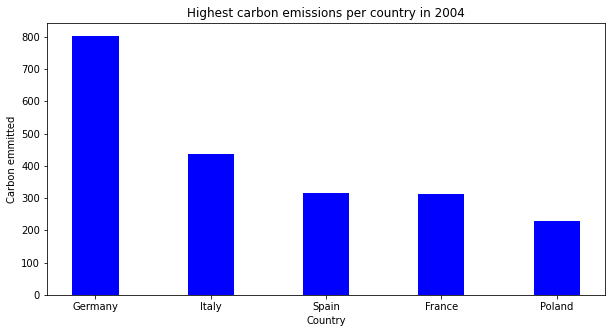

In [ ]:
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = {'Germany':802.50, 'Italy':437.69, 'Spain':316.44,
        'France':311.47, 'Poland': 230.24}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Country")
plt.ylabel("Carbon emmitted")
plt.title("Highest carbon emissions per country in 2004")
plt.show()

In [ ]:
# getting least carnon emitors
leastemit = total_data.groupby(['Country'])['2004_x'].min().sort_values(ascending= True).head(5)
leastemit

Country
Latvia        -6.24
Malta          2.60
Slovenia       4.18
Cyprus         7.45
Luxembourg    11.17
Name: 2004_x, dtype: float64

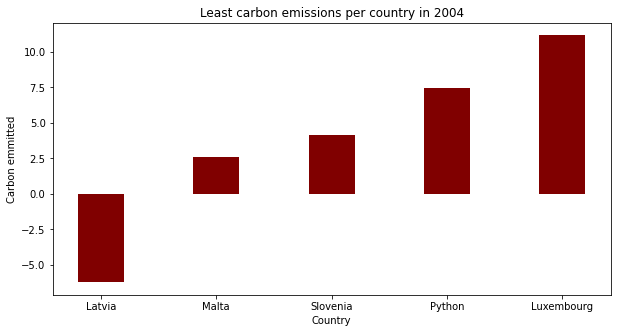

In [ ]:
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = {'Latvia':-6.24, 'Malta':2.60, 'Slovenia':4.18,
        'Python':7.45, 'Luxembourg': 11.17}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Country")
plt.ylabel("Carbon emmitted")
plt.title("Least carbon emissions per country in 2004")
plt.show()

3. To find which sub sectors had the most greenhouse gas emissions.

In [ ]:
# We group the data by sector and the respective years to get which sector had the highest emissions and in which year.
sectors = merged.groupby(['Sector'])['2004_x', '2005_x', '2006_x', '2007_x', '2008_x', '2009_x', '2010_x', '2011_x', '2012_x', '2013_x', '2014_x'].sum()
sectors



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,2004_x,2005_x,2006_x,2007_x,2008_x,2009_x,2010_x,2011_x,2012_x,2013_x,2014_x
Sector,,,,,,,,,,,
Building,563.36,563.23,560.79,484.59,526.42,514.41,541.03,473.58,485.49,495.53,422.86
Bunker Fuels,236.51,242.96,257.63,268.94,269.02,242.68,244.66,246.17,234.84,227.88,225.19
Electricity/Heat,1449.36,1442.61,1455.82,1481.35,1405.84,1292.72,1330.92,1314.37,1294.03,1226.93,1158.16
Energy,3413.43,3393.23,3398.38,3353.71,3283.14,3050.80,3138.10,3041.43,2986.31,2915.99,2768.22
Fugitive Emissions,2.78,2.69,2.61,2.64,2.57,2.18,1.95,2.07,1.86,1.82,1.78
Industrial Processes,95.57,96.06,98.65,103.08,96.04,78.56,77.00,75.74,71.34,67.60,70.81
Land-Use Change and Forestry,-314.99,-314.87,-314.80,-314.73,-314.67,-314.56,-314.34,-575.23,-575.16,-575.18,-575.23
Manufacturing/Construction,497.32,485.34,470.57,471.88,452.94,375.29,401.79,397.23,382.69,375.84,364.64
Other Fuel Combustion,76.11,76.49,73.93,69.76,68.58,66.10,68.32,65.73,64.28,64.46,62.13


In [ ]:
sectors.drop(['Total excluding LUCF','Total including LUCF'], axis=0, inplace=True)

sectors

,2004_x,2005_x,2006_x,2007_x,2008_x,2009_x,2010_x,2011_x,2012_x,2013_x,2014_x
Sector,,,,,,,,,,,
Building,563.36,563.23,560.79,484.59,526.42,514.41,541.03,473.58,485.49,495.53,422.86
Bunker Fuels,236.51,242.96,257.63,268.94,269.02,242.68,244.66,246.17,234.84,227.88,225.19
Electricity/Heat,1449.36,1442.61,1455.82,1481.35,1405.84,1292.72,1330.92,1314.37,1294.03,1226.93,1158.16
Energy,3413.43,3393.23,3398.38,3353.71,3283.14,3050.80,3138.10,3041.43,2986.31,2915.99,2768.22
Fugitive Emissions,2.78,2.69,2.61,2.64,2.57,2.18,1.95,2.07,1.86,1.82,1.78
Industrial Processes,95.57,96.06,98.65,103.08,96.04,78.56,77.00,75.74,71.34,67.60,70.81
Land-Use Change and Forestry,-314.99,-314.87,-314.80,-314.73,-314.67,-314.56,-314.34,-575.23,-575.16,-575.18,-575.23
Manufacturing/Construction,497.32,485.34,470.57,471.88,452.94,375.29,401.79,397.23,382.69,375.84,364.64
Other Fuel Combustion,76.11,76.49,73.93,69.76,68.58,66.10,68.32,65.73,64.28,64.46,62.13


In [ ]:
sectors.max() # 2004 had the highest CO₂ emissions 

2004_x    3413.43
2005_x    3393.23
2006_x    3398.38
2007_x    3353.71
2008_x    3283.14
2009_x    3050.80
2010_x    3138.10
2011_x    3041.43
2012_x    2986.31
2013_x    2915.99
2014_x    2768.22
dtype: float64

The year 2004 had the highest emissions

In [ ]:
specific_sector = sectors.groupby(['Sector'])['2004_x'].max().sort_values(ascending= False).head(5)
specific_sector

Sector
Energy                        3413.43
Electricity/Heat              1449.36
Transportation                 824.53
Building                       563.36
Manufacturing/Construction     497.32
Name: 2004_x, dtype: float64

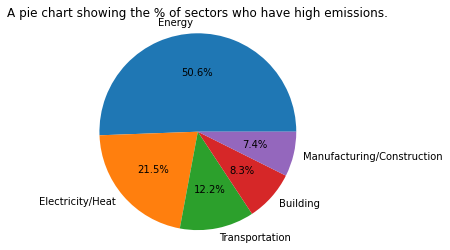

In [ ]:
# Import libraries
from matplotlib import pyplot as plt
import numpy as np
 
 
my_data = [3413.43,1449.36,824.53,563.36,497.32]
my_labels = 'Energy ','Electricity/Heat','Transportation','Building','Manufacturing/Construction'
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%')
plt.title('A pie chart showing the % of sectors who have high emissions.')
plt.axis('equal')
plt.show()

4. To find which European countries have embraced nuclear power as an alternative source of energy.

In [ ]:
# We get the countries in Europe which have nuclear power if the year in which they began to use nuclear power(onset column) is not zero 
#nuclear_country = merged[merged['onset'] != '0']
#nuclear_country['Country'].value_counts()


nuclear_country = euronuclear[euronuclear['onset'] != '0']
nuclear_country['Country'].value_counts()


Belgium      1
Bulgaria     1
Croatia      1
Estonia      1
Finland      1
France       1
Germany      1
Lithuania    1
Malta        1
Portugal     1
Romania      1
Slovenia     1
Sweden       1
Name: Country, dtype: int64

In [ ]:
# displaying the data
nuclear_country

,Country,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,onset
1,Belgium,56.088106,55.530924,55.300659,55.098940,54.518263,52.582233,51.095031,54.186982,49.368422,51.901076,47.135744,1962
2,Bulgaria,40.590450,42.420176,42.839875,34.103454,35.360219,35.997263,33.137753,32.612998,33.888662,32.903016,33.812091,1974
3,Croatia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1983
6,Estonia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1977
7,Finland,26.461646,32.970162,27.828263,28.830082,29.649241,32.643716,28.261894,31.546510,32.646888,33.127973,34.628602,1960
8,France,78.817148,79.047811,79.059659,77.999227,77.258343,77.212091,75.940527,79.511660,75.962780,74.704486,78.235588,1961
9,Germany,27.338182,26.478564,26.435995,22.178035,23.407894,22.871149,22.432144,17.780965,15.946309,15.371004,15.617152,1983
15,Lithuania,80.535410,71.710024,71.632028,72.999258,74.240264,74.110496,0.000000,0.000000,0.000000,0.000000,0.000000,1990
17,Malta,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1969
20,Portugal,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1996


In [ ]:
# Countries without nuclear power will have a zero in the onset column.
nuclear_negative = euronuclear[euronuclear['onset'] == '0']
nuclear_negative['Country'].value_counts()

Austria           1
Czech Republic    1
Denmark           1
Greece            1
Hungary           1
Ireland           1
Italy             1
Latvia            1
Luxembourg        1
Netherlands       1
Poland            1
Spain             1
Name: Country, dtype: int64

In [ ]:
# Displaying the data
nuclear_negative

,Country,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,onset
0,Austria,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,Czech Republic,31.417830,30.181494,31.135391,29.820883,31.875863,33.330067,32.818361,32.593113,34.981024,35.746675,35.636223,0
5,Denmark,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
10,Greece,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
11,Hungary,35.347692,38.690010,37.538693,36.729229,37.021861,42.959786,42.174413,43.546462,45.598383,50.736119,53.242379,0
12,Ireland,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
13,Italy,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
14,Latvia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
16,Luxembourg,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
18,Netherlands,3.776157,4.000160,3.509961,3.993724,3.876265,3.736444,3.327744,3.633635,3.790006,2.841669,3.955791,0


In [ ]:
# we then arrange the dataset in ascending ordewr of years to get the countries that had the earliest and latest onsets.
x = nuclear_country[['Country', 'onset']].value_counts()
nu_cntry = pd.DataFrame(x)
nu_cntry.sort_values(by = ['onset'], ascending = True)  # In this case Finland is earliest and Portugal was latest

,,0
Country,onset,
Finland,1960,1
France,1961,1
Belgium,1962,1
Sweden,1965,1
Slovenia,1968,1
Malta,1969,1
Bulgaria,1974,1
Estonia,1977,1
Croatia,1983,1


5. To compare pollution levels of European countries that have embraced nuclear energy and those that have not.


In [ ]:
europollution.head()


,Country,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Austria,26.340707,25.084497,23.913930,23.079863,22.128440,21.558927,20.593919,19.698427,18.847269,17.847371,16.822232
1,Belgium,26.615026,25.352886,24.218773,24.039388,23.931682,23.774549,23.128022,21.984391,20.697425,18.953031,17.050308
2,Bulgaria,120.507575,116.869741,113.662799,108.444959,103.569252,99.598257,96.503497,92.621130,87.625126,83.142460,83.015225
3,Croatia,64.190056,63.393544,60.456622,59.626053,57.924868,53.917522,51.449360,49.230353,47.402209,44.451071,43.485294
4,Czechia,53.472423,51.576061,48.520310,47.024236,45.939716,44.371853,42.843923,41.446955,39.481613,37.444197,34.821569


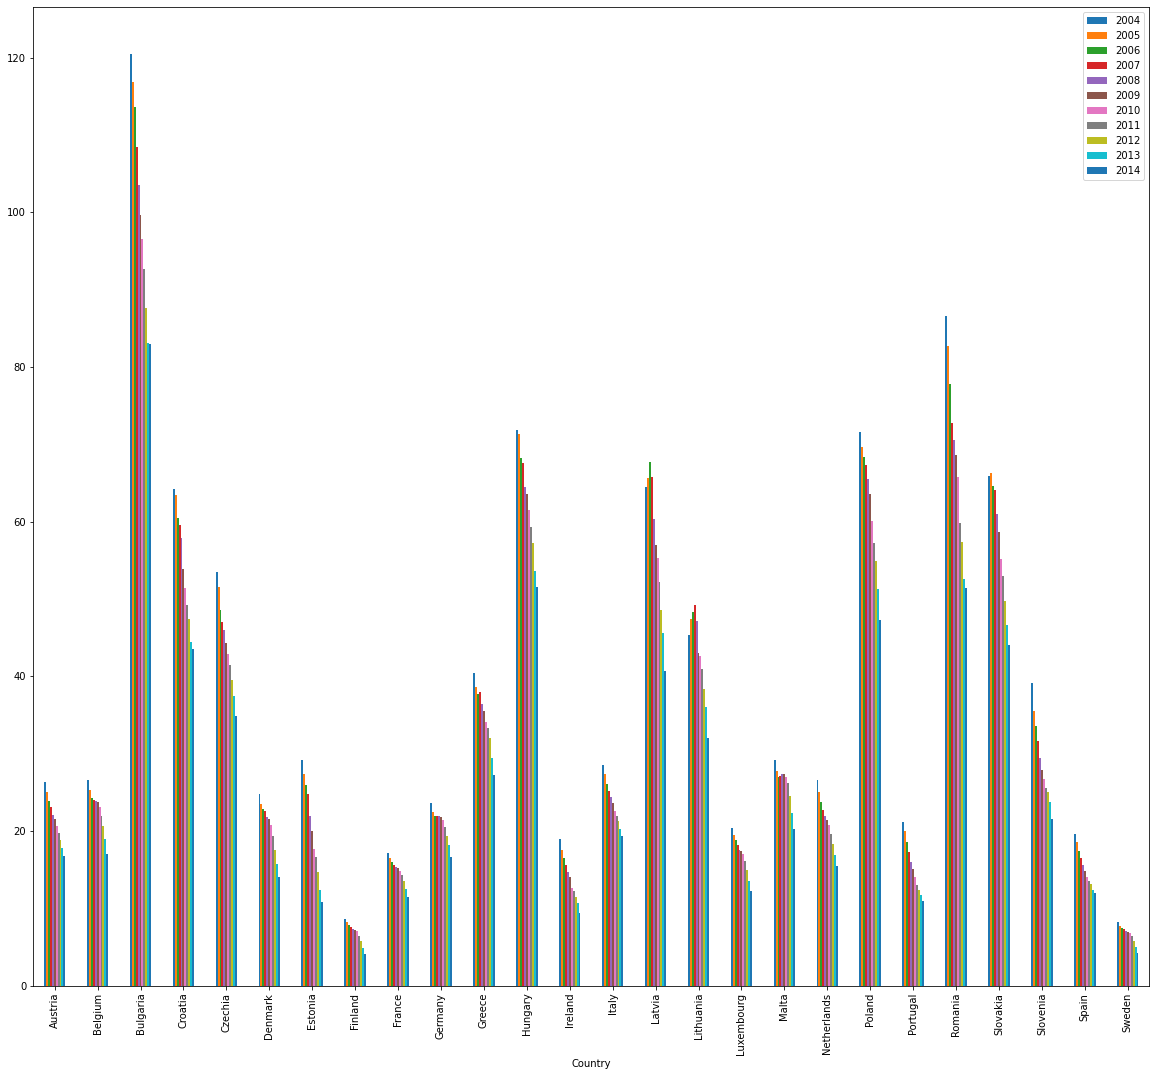

In [ ]:
europollution.plot(x='Country', y= ["2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014"], kind="bar", figsize=(20, 18))

It can be noted that pollution levels are reducing over the 10 years in all the countries.

It is noted that countries that are in Western Europe, have higher GDP have few emissions and that countries in Eastern Europe have higher emissions and have lower GDP compared to the western ones. Whan a country has low GDP, it does not afford to sustain measures of reducing carbon emissions such as using less fossil fuels.

# Conclusion

When a country has good governance policies, they are able to regulate more of their industries and therefore can reduce carbon emissions. Therefore good governance leads to reduced carbon emissions.
(The EU countries in the OECD are Austria, Belgium, Denmark, France, Germany, Greece, Iceland, Ireland, Italy, Luxembourg, the Netherlands, Norway, Portugal, Spain, Sweden, the United Kingdom) of which most have lower carbon emissions.

#Recommendation


From our analysis, we found that the energy sector has the highest carbon emissions. Therefore we would recommend that countries use cleaner forms of energy such as adupting nuclear energy and other clean forms of energy such as solar